- Data is in CSV Format
- Using Pandas to load it all into a DataFrame

In [1]:
import pandas as pd

df = pd.read_csv('../_assets/heart_failure_clinical_records_dataset.csv')

- Checking first 5 instances to get an idea about the data
- Values of datapoints are variant for different columns (Problem-1 | Requires normalization)

In [2]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- Could not make sense or find relation of the column "time" with DEATH_EVENT (output label)
- So, dropping the column "Time" from the DataFrame.

In [3]:
df.drop('time', inplace=True, axis=1)

- Checking the shape of the DataFrame

In [4]:
df.shape

(299, 12)

- Trying to get the summary of the data types that is used throughout the dataset
- Looks like no null value, good sign.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


- Trying to get the mean, standard deviation, max etc. for the columns, in order to understand if there is any central tendency, dispersion and shape of our dataset’s distribution, excluding NaN values.

In [6]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


- Checking if there is any null values
- No null values found
- So, no help from statistics is required to mitigate this issue.

In [7]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

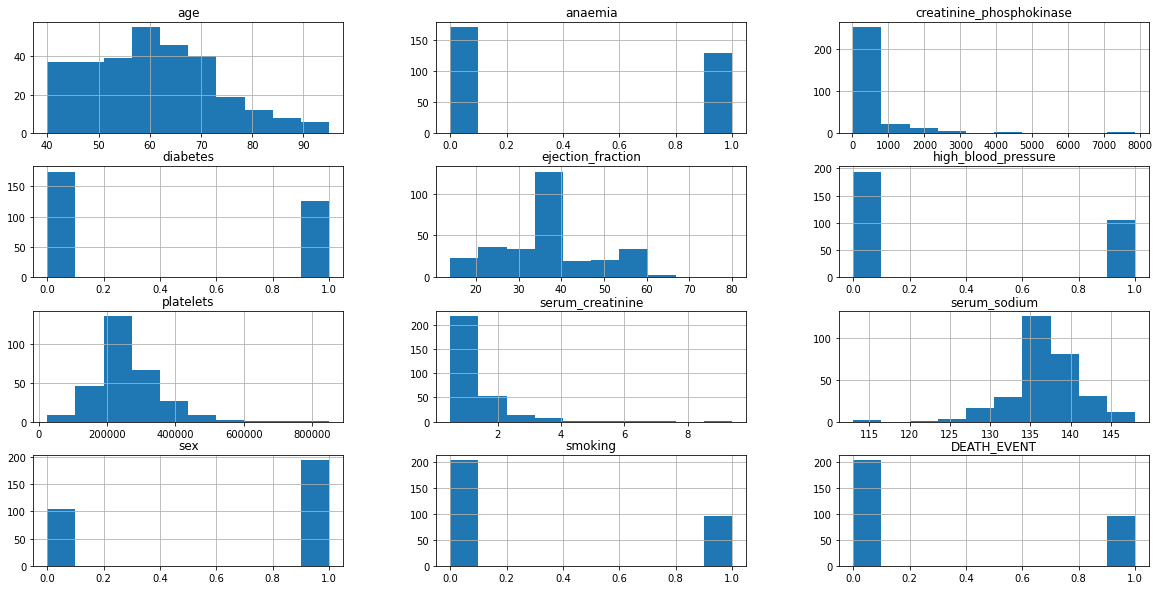

In [8]:
hist_all = df.hist(bins=10, figsize=(20, 10),grid=True,)

- Checking for the class imbalance
- Data is quite skwed towards 0 (RECOVERED) class (Problem-2 | Class needs to be balanced)

In [9]:
print("# of instances for people DIED:", df[df.DEATH_EVENT==1].shape[0])
print("# of instances for people RECOVERED:", df[df.DEATH_EVENT==0].shape[0])
# df[df.DEATH_EVENT==0].shape[0]

# of instances for people DIED: 96
# of instances for people RECOVERED: 203


- Trying to get the correlationship matrix and generate a heatmap using it
- No features are found that are highly correlated. So, PCA is not required.

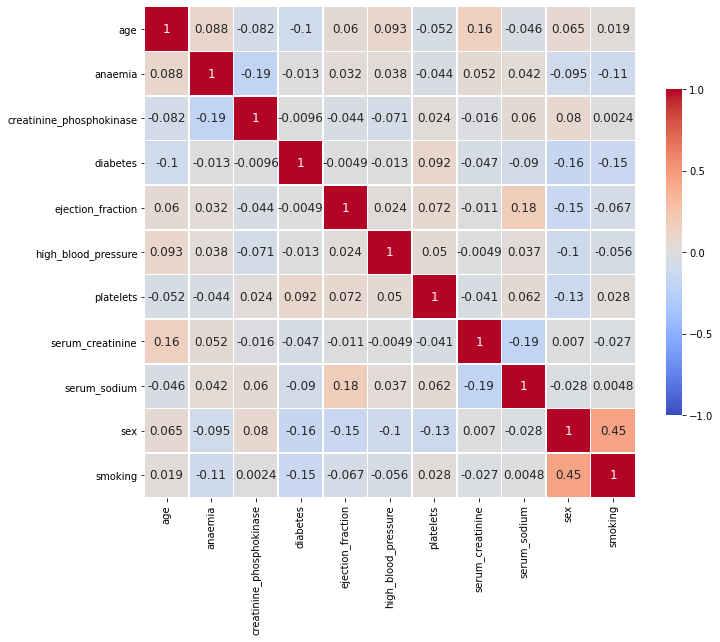

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

corr_matrix = df.iloc[:, :-1].corr()

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
#                       mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})